In [1]:
from module.sql import SQL
from module.visualisation import Visualization
from module.models import IdealFunctionSelector

In [2]:
sql = SQL("iudatabase")
df_train = sql.read_table("train")
df_test = sql.read_table("test")
df_ideal = sql.read_table("ideal")

In [3]:
df_train.head()

,index,x,y1,y2,y3,y4
0,0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


In [4]:
df_test.head()

,index,x,y
0,0,17.5,34.161040
1,1,0.3,1.215102
2,2,-8.7,-16.843908
3,3,-19.2,-37.170870
4,4,-11.0,-20.263054


In [5]:
df_ideal.head()

,index,x,y1,y2,y3,y4,y5,y6,y7,y8,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [6]:
selector = IdealFunctionSelector(df_train, df_ideal, df_test)

In [7]:
type(selector)

module.models.IdealFunctionSelector

In [9]:
selected_functions = selector.select_ideal_functions()

[47 43 49  1]


In [10]:
mapped = selector.map_test_data(selected_functions)

In [14]:
print(mapped)

    index     x          y  deviation_47  deviation_43  deviation_49  \
0       0  17.5  34.161040     39.459357     31.165308     33.248095   
1       1   0.3   1.215102      6.508407      1.775617      0.347458   
2       2  -8.7 -16.843908     11.555641     19.829590     17.657582   
3       3 -19.2 -37.170870     31.887666     40.151489     37.922443   
4       4 -11.0 -20.263054     14.984939     23.238584     20.945018   
..    ...   ...        ...           ...           ...           ...   
95     95  -1.9  -4.036904      0.617056      6.388280      3.157208   
96     96  12.2  -0.010358      4.634033      2.352164      0.817468   
97     97  16.5 -33.964134     29.329405     36.296278     33.196448   
98     98   5.3 -10.291622      5.666649     12.614010      9.591747   
99     99  17.9  28.078455     32.693575     25.765920     28.703526   

    deviation_1  
0     35.073985  
1      2.082746  
2     16.030234  
3     36.419297  
4     19.581090  
..          ...  
95     4.

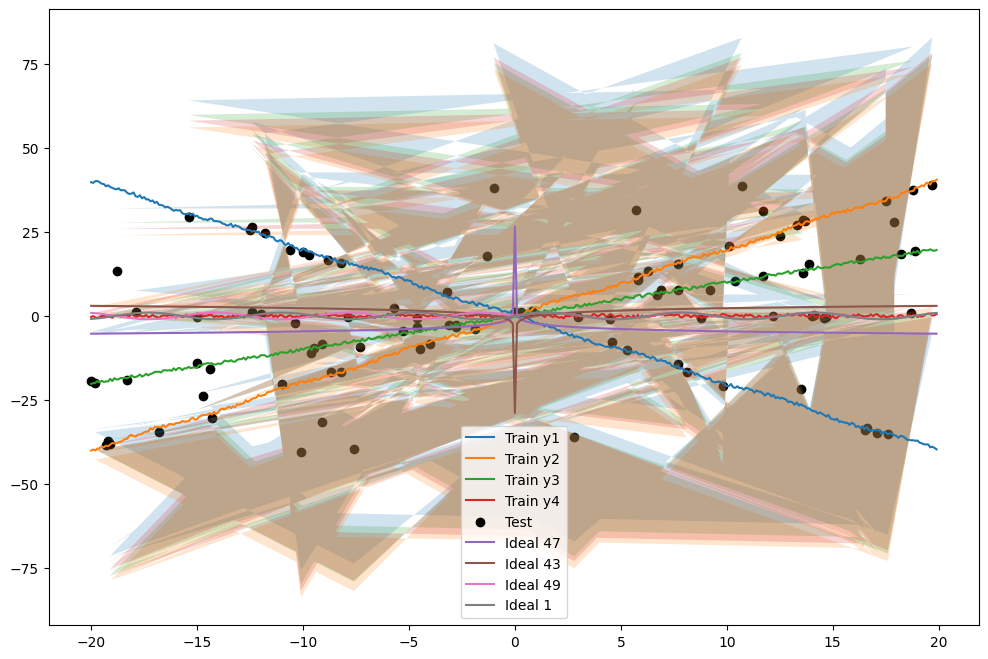

In [12]:
vis = selector.visualize(selected_functions, mapped)
vis